## 1 Climate Change, Greenhouse Effect

In [1]:
import numpy as np
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import matplotlib.pyplot as plt
from datetime import datetime
import scipy
import scipy.stats

(a) Black Body Temperature

In [10]:
Albedo = 0.3
F_s = 1370.0
sigma = 5.67*10**(-8.0)


F_e = ((1.0-Albedo)*(F_s))/(4.0)
T_e = ((F_e)/(sigma))**(1.0/4.0)

print "Earth's equivalent blackbody temperature is %.0fK" % T_e

Earth's equivalent blackbody temperature is 255K


(b) Simluated greenhouse effect

In [23]:
#about 50% of the energy from the sun is in infrared

B = Albedo-((0.50))

F_egh = ((1.0-B)*(F_s))/(4.0)
T_egh = ((F_egh)/(sigma))**(1.0/4.0)

print "The equivalent blackbody temperature of the Earth with atmosphereic blanked would be %.0fk of about %.0fK higher" % (T_egh, T_egh-T_e)

The equivalent blackbody temperature of the Earth with atmosphereic blanked would be 292k of about 37K higher


(c) Expected temperature equation

In [27]:
def T(Lambda):
    return ((((1.0-(Lambda))*(F_s))/(4.0))/(sigma))**(1.0/4.0)

Albedo = 0.3

temp = T(Albedo)

print "An Albedo of %.2f gives an equivalent temperature of %.0fK" % (Albedo, temp)

An Albedo of 0.30 gives an equivalent temperature of 255K


(d) The Albedo is changed by an increase in concentration of greenhouse gasses. Water is the most prominent greenhouse gas because it absorbs the most amount of energy in the spectrum radiated to Earth.  Water is also the most problematic due to the reason stated in the previous sentence.

(e) Simply stated: yes, we are in trouble.

# 2 El Nino, ENSO, and Correlations

(a) Basemap plot of the SST for 20160101 where NINO3 is measured

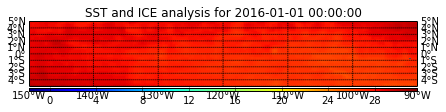

In [29]:
date = datetime(2016,1,1,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(projection='mill',lon_0=0,resolution=None,llcrnrlon=-150,llcrnrlat=-5,urcrnrlon=-90,urcrnrlat=5)
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,90.,1.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[1,1,0,1])
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

(b) NINO3 data as a function of time

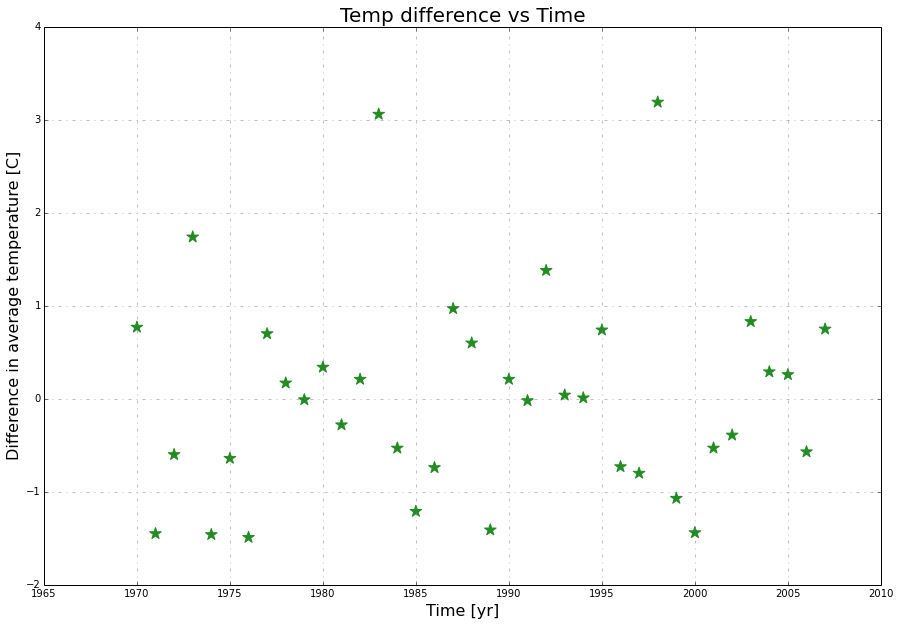

In [53]:
NINO3_data = np.loadtxt("hw8NINO3.txt", comments="#", delimiter=",", unpack=False)
years_data = np.loadtxt("hw8years.txt", comments="#", delimiter=",", unpack=False)

plt.figure(figsize=(15,10))
plt.scatter(years_data, NINO3_data, marker='*', s=150, color='#228B22')
plt.grid(True,linestyle="-.", color='gray')
plt.xlabel('Time [yr]',fontsize=16)
plt.ylabel('Difference in average temperature [C]', fontsize=16)
plt.title('Temp difference vs Time',fontsize=20)

(c) The five largest El Nino events occured in 1973, 1983, 1987, 1992, and 1998.

(d) These events seem to occasionally relate to extreme events in precipitation/temperature.  However, not all of the extreme temperature differences are coupled with extreme precipitation.

(e)

In [77]:
temp_data = np.loadtxt("hw8temp.txt", comments="#", delimiter=",", unpack=False)
precip_data = np.loadtxt("hw8precip.txt", comments="#", delimiter=",", unpack=False)
snowdepth_data = np.loadtxt("hw8snowdepth.txt", comments="#", delimiter=",", unpack=False)

temperature = np.corrcoef(NINO3_data, temp_data, rowvar=False, bias=True)
precip = np.corrcoef(NINO3_data, precip_data, rowvar=False, bias=True)
snowdepth = np.corrcoef(NINO3_data, snowdepth_data, rowvar=False, bias=True)

print "The correlation between ENSO and temperature is %.4f, this indicates no correlation." % temperature[1,0]
print "The correlation between ENSO and precipitation is %.4f, this indicates a slight correlation." % precip[1,0]
print "The correlation between ENSO and snow is %.4f, this indicates very weak or no correlation." % snowdepth[1,0]
print "No, an argument might be made for a correlation between El Nino and precipitation however there is no correlation\n between El Nino and snow."
print "These results to not seem inconsistent with the maps provided."

The correlation between ENSO and temperature is 0.0051, this indicates no correlation.
The correlation between ENSO and precipitation is 0.3771, this indicates a slight correlation.
The correlation between ENSO and snow is 0.1420, this indicates very weak or no correlation.
No, an argument might be made for a correlation between El Nino and precipitation however there is no correlation
 between El Nino and snow.
These results to not seem consistent with the maps provided.


(f) The graphic shows a warming trend that slowly moves to the north-west in a strip of the Pacific Ocean.  We are currently in a neutral event.